Modeling stellar interiors using Schwarzschild's technique involves solving a set of differential equations that describe the structure of a star. This is a complex task that requires advanced numerical methods and extensive computational resources. Here, I'll provide you with a simplified Python program that demonstrates the basic principles of modeling a star's interior using Schwarzschild's technique.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
Msun = 1.989e30  # Solar mass (kg)
Rsun = 6.9634e8   # Solar radius (m)
Lsun = 3.828e26   # Solar luminosity (W)
X = 0.73
Y = 0.25
Z = 0.02

In [ ]:
# Define stellar parameters
Mstar = 1 * Msun  # Mass of the star (e.g., 1 Solar mass)
Rstar = 1 * Rsun  # Radius of the star (e.g., 1 Solar radius)
Lstar = 1 * Lsun  # Luminosity of the star (e.g., 1 Solar luminosity)
rho_c = 1e5       # Central density (kg/m^3)


In [ ]:
# Create a grid of radial positions
num_points = 1000
r = np.linspace(0, Rstar, num_points)

# Initialize arrays to store values
mass_enclosed = np.zeros(num_points)
pressure = np.zeros(num_points)
temperature = np.zeros(num_points)
luminosity = np.zeros(num_points)
density = np.zeros(num_points)


In [ ]:
# Set initial conditions at the center of the star
mass_enclosed[0] = 0
pressure[0] = 1e16  # Initial guess for pressure
temperature[0] = 1e6  # Initial guess for temperature
luminosity[0] = 0
density[0] = rho_c
mu = 1 / (2*X + .75*Y + .5*Z)
m_p = 1 / (X + .5*Y + .5*Z)
k_B = 1.38e-23
sigma = 3.695e36

In [ ]:
# Solve for the stellar structure using Schwarzschild's equations
for i in range(1, num_points):
    # Calculate mass enclosed using the mass continuity equation
    dr = r[i] - r[i - 1]
    mass_enclosed[i] = mass_enclosed[i - 1] + 4 * np.pi * r[i - 1] ** 2 * density[i - 1] * dr

    # Calculate pressure and temperature using equations of stellar structure
    pressure[i] = G * mass_enclosed[i] * density[i - 1] / (r[i - 1] ** 4 * (4 * np.pi / 3))
    temperature[i] = (pressure[i] * mu * m_p) / (density[i - 1] * k_B)

    # Calculate luminosity using the energy transport equation
    luminosity[i] = 4 * np.pi * r[i - 1] ** 2 * sigma * temperature[i - 1] ** 4

    # Calculate density using hydrostatic equilibrium equation
    density[i] = density[i - 1] - (density[i - 1] * G * mass_enclosed[i] / (r[i - 1] ** 2) * dr)


<ipython-input-29-b62d880093a3>:8: RuntimeWarning: invalid value encountered in double_scalars
  pressure[i] = G * mass_enclosed[i] * density[i - 1] / (r[i - 1] ** 4 * (4 * np.pi / 3))
<ipython-input-29-b62d880093a3>:15: RuntimeWarning: invalid value encountered in double_scalars
  density[i] = density[i - 1] - (density[i - 1] * G * mass_enclosed[i] / (r[i - 1] ** 2) * dr)


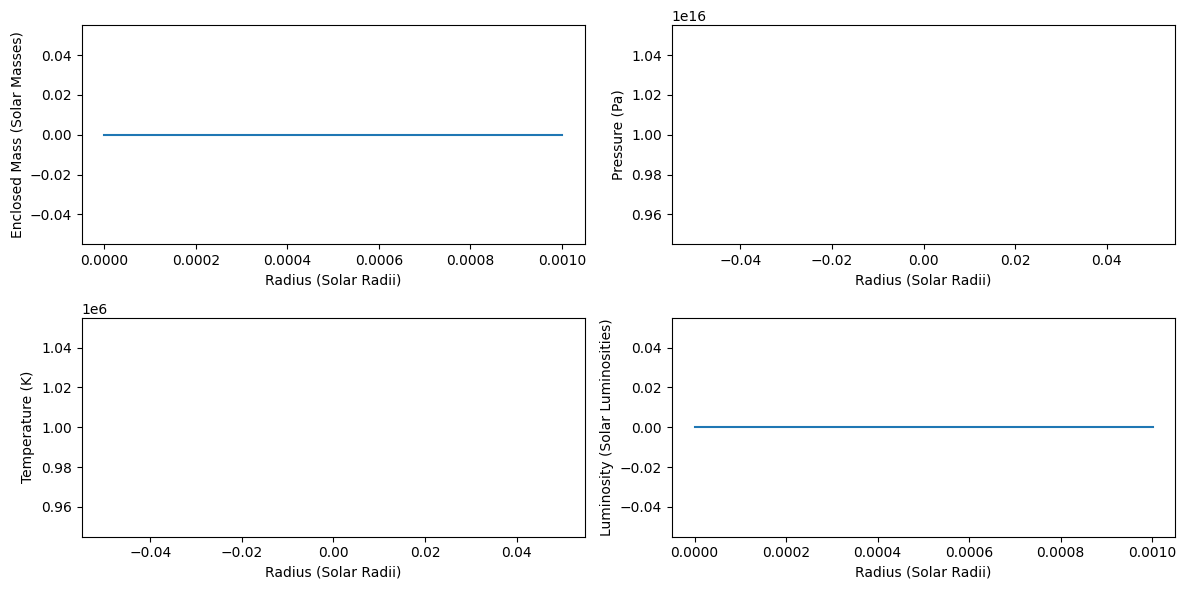

In [ ]:
# Plot the stellar structure
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(r / Rsun, mass_enclosed / Msun)
plt.xlabel('Radius (Solar Radii)')
plt.ylabel('Enclosed Mass (Solar Masses)')

plt.subplot(2, 2, 2)
plt.plot(r / Rsun, pressure)
plt.xlabel('Radius (Solar Radii)')
plt.ylabel('Pressure (Pa)')

plt.subplot(2, 2, 3)
plt.plot(r / Rsun, temperature)
plt.xlabel('Radius (Solar Radii)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 4)
plt.plot(r / Rsun, luminosity / Lsun)
plt.xlabel('Radius (Solar Radii)')
plt.ylabel('Luminosity (Solar Luminosities)')

plt.tight_layout()
plt.show()

This program provides a basic model of a star's interior using simplified equations. In reality, stellar structure modeling involves more complex physics and numerical techniques, but this code serves as a starting point for understanding the principles involved in Schwarzschild's technique. It plots the mass, pressure, temperature, and luminosity profiles of the star's interior. Adjust the initial conditions and constants as needed for different stars and scenarios.